### 5장. 기하학적 변환

- 영상의 모양을 바꾸는 방법을 배우는 장
- 기하학적 변환은 영상의 좌표에 기하학적인 연산을 가해 변환된 새로운 좌표를 얻는 것이다.

### 5-1. 이동, 확대/축소, 회전
- 변환 행렬을 이용하여 영상 변환에 가장 흔하게 사용하는 내용을 알아보자.

#### 이동

- cv2.warpAffine() : 영상을 행렬에 따라 변환해서 dsize 크기로 만들어 반환한다.
- x_1 = x + 이동할 만큼(dx)
- y_1 = y + 이동할 만큼(dy)

In [1]:
path = 'C:/Users/hu612/Downloads/insightbook.opencv_project_python-master/insightbook.opencv_project_python-master'

In [4]:
import cv2
import numpy as np

img = cv2.imread(path+'/img/heart.jpg')
rows,cols = img.shape[0:2]  # 영상의 크기

dx, dy = 100, 50            # 이동할 픽셀 거리

# ---① 변환 행렬 생성 
mtrx = np.float32([[1, 0, dx],
                   [0, 1, dy]])  
# ---② 단순 이동
dst = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy))   

# ---③ 탈락된 외곽 픽셀을 파랑색으로 보정
dst2 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0) )

# ---④ 탈락된 외곽 픽셀을 원본을 반사 시켜서 보정
dst3 = cv2.warpAffine(img, mtrx, (cols+dx, rows+dy), None, \
                                cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

cv2.imshow('original', img)
cv2.imshow('trans',dst)
cv2.imshow('BORDER_CONSTATNT', dst2)
cv2.imshow('BORDER_FEFLECT', dst3)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 여기서는 외곽 영역 외에는 픽셀의 탈락이 발생하지 않으므로 보간법 알고리즘을 선택하는 네 번째 인자는 의미가 없다.

#### 확대/축소

- 원하는 비율만큼 곱해서 작게 만들거나 크게 만들 수 있다.
#### 1) 변환 행렬 이용

In [5]:
import cv2
import numpy as np

img = cv2.imread('../img/fish.jpg')
height, width = img.shape[:2]

# --① 0.5배 축소 변환 행렬
m_small = np.float32([[0.5, 0, 0],
                       [0, 0.5,0]])  
# --② 2배 확대 변환 행렬
m_big = np.float32([[2, 0, 0],
                     [0, 2, 0]])  

# --③ 보간법 적용 없이 확대 축소
dst1 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)))
dst2 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)))

# --④ 보간법 적용한 확대 축소
dst3 = cv2.warpAffine(img, m_small, (int(height*0.5), int(width*0.5)), \
                        None, cv2.INTER_AREA)
dst4 = cv2.warpAffine(img, m_big, (int(height*2), int(width*2)), \
                        None, cv2.INTER_CUBIC)

# 결과 출력
cv2.imshow("original", img)
cv2.imshow("small", dst1)
cv2.imshow("big", dst2)
cv2.imshow("small INTER_AREA", dst3)
cv2.imshow("big INTER_CUBIC", dst4)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2) cv2.resize() 함수 이용

In [6]:
import cv2
import numpy as np

img = cv2.imread('../img/fish.jpg')
height, width = img.shape[:2]

#--① 크기 지정으로 축소
#dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)),\
#                        None, 0, 0, cv2.INTER_AREA)
dst1 = cv2.resize(img, (int(width*0.5), int(height*0.5)), \
                         interpolation=cv2.INTER_AREA)

#--② 배율 지정으로 확대
dst2 = cv2.resize(img, None,  None, 2, 2, cv2.INTER_CUBIC)
#--③ 결과 출력
cv2.imshow("original", img)
cv2.imshow("small", dst1)
cv2.imshow("big", dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 회전

#### 1) 변환행렬 사용

In [7]:
import cv2
import numpy as np

img = cv2.imread('../img/fish.jpg')
rows,cols = img.shape[0:2]

# ---① 라디안 각도 계산(60진법을 호도법으로 변경)
d45 = 45.0 * np.pi / 180    # 45도
d90 = 90.0 * np.pi / 180    # 90도

# ---② 회전을 위한 변환 행렬 생성
m45 = np.float32( [[ np.cos(d45), -1* np.sin(d45), rows//2],
                    [np.sin(d45), np.cos(d45), -1*cols//4]])
m90 = np.float32( [[ np.cos(d90), -1* np.sin(d90), rows],
                    [np.sin(d90), np.cos(d90), 0]])

# ---③ 회전 변환 행렬 적용
r45 = cv2.warpAffine(img,m45,(cols,rows))
r90 = cv2.warpAffine(img,m90,(rows,cols))

# ---④ 결과 출력
cv2.imshow("origin", img)
cv2.imshow("45", r45)
cv2.imshow("90", r90)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 2) cv2.getRotationMatrix2D() 함수 사용

In [8]:
import cv2

img = cv2.imread('../img/fish.jpg')
rows,cols = img.shape[0:2]

#---① 회전을 위한 변환 행렬 구하기
# 회전축:중앙, 각도:45, 배율:0.5
m45 = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5) 
# 회전축:중앙, 각도:90, 배율:1.5
m90 = cv2.getRotationMatrix2D((cols/2,rows/2),90,1.5) 

#---② 변환 행렬 적용
img45 = cv2.warpAffine(img, m45,(cols, rows))
img90 = cv2.warpAffine(img, m90,(cols, rows))

#---③ 결과 출력
cv2.imshow('origin',img)
cv2.imshow("45", img45)
cv2.imshow("90", img90)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 5-2. 뒤틀기

#### 어핀 변환
- 직선, 길이의 비율, 평행성을 보존하는 변환을 의미한다.
- 변환 전과 후의 3개의 점을 짝 지어 매핑할 수 있다면 변환행렬을 거꾸로 계산할 수 있는데, 이를 cv2.getAffineTransform() 함수로 구현할 수 있다.

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

file_name = '../img/heart.jpg'
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

# ---② 변환 전 좌표를 이미지에 표시
# 의문. bgr 순인데 (255,0,0)이면 blue인데 왜 (255,0)인가...
cv2.circle(img, (100,50), 5, (255,0,0), -1)
cv2.circle(img, (200,50), 5, (0,255,0), -1)
cv2.circle(img, (100,70), 5, (0,0,255), -1)

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(img, mtrx, (int(cols*1.5), rows))

#---⑤ 결과 출력
cv2.imshow('origin',img)
cv2.imshow('affin', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 원근 변환
- 원근감을 주는 변환을 의미한다.
- 원근감을 느끼는 이유는 실제 세계가 3차원 좌표인데, 영상은 2차원 좌표이기 때문이다.
- 차원 간 보정을 해 줄 추가 연산이 필요한데, 이때 사용하는 좌표계를 동차 좌표라고 한다,

In [14]:
import cv2
import numpy as np

file_name = "../img/fish.jpg"
img = cv2.imread(file_name)
rows, cols = img.shape[:2]

#---① 원근 변환 전 후 4개 좌표
pts1 = np.float32([[0,0], [0,rows], [cols, 0], [cols,rows]])
pts2 = np.float32([[100,50], [10,rows-50], [cols-100, 50], [cols-10,rows-50]])

#---② 변환 전 좌표를 원본 이미지에 표시
cv2.circle(img, (0,0), 10, (255,0,0), -1)
cv2.circle(img, (0,rows), 10, (0,255,0), -1)
cv2.circle(img, (cols,0), 10, (0,0,255), -1)
cv2.circle(img, (cols,rows), 10, (0,255,255), -1)

#---③ 원근 변환 행렬 계산
mtrx = cv2.getPerspectiveTransform(pts1, pts2)
#---④ 원근 변환 적용
dst = cv2.warpPerspective(img, mtrx, (cols, rows))

cv2.imshow("origin", img)
cv2.imshow('perspective', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
import numpy as np

win_name = "scanning"
img = cv2.imread("../img/paper3.jpg")
rows, cols = img.shape[:2]
draw = img.copy()
pts_cnt = 0
pts = np.zeros((4,2), dtype=np.float32)

def onMouse(event, x, y, flags, param):  #마우스 이벤트 콜백 함수 구현 ---① 
    global  pts_cnt                     # 마우스로 찍은 좌표의 갯수 저장
    if event == cv2.EVENT_LBUTTONDOWN:  
        cv2.circle(draw, (x,y), 10, (0,255,0), -1) # 좌표에 초록색 동그라미 표시
        cv2.imshow(win_name, draw)

        pts[pts_cnt] = [x,y]            # 마우스 좌표 저장
        pts_cnt+=1
        if pts_cnt == 4:                       # 좌표가 4개 수집됨 
            # 좌표 4개 중 상하좌우 찾기 ---② 
            sm = pts.sum(axis=1)                 # 4쌍의 좌표 각각 x+y 계산
            diff = np.diff(pts, axis = 1)       # 4쌍의 좌표 각각 x-y 계산

            topLeft = pts[np.argmin(sm)]         # x+y가 가장 값이 좌상단 좌표
            bottomRight = pts[np.argmax(sm)]     # x+y가 가장 큰 값이 좌상단 좌표
            topRight = pts[np.argmin(diff)]     # x-y가 가장 작은 것이 우상단 좌표
            bottomLeft = pts[np.argmax(diff)]   # x-y가 가장 큰 값이 좌하단 좌표

            # 변환 전 4개 좌표 
            pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

            # 변환 후 영상에 사용할 서류의 폭과 높이 계산 ---③ 
            w1 = abs(bottomRight[0] - bottomLeft[0])    # 상단 좌우 좌표간의 거리
            w2 = abs(topRight[0] - topLeft[0])          # 하당 좌우 좌표간의 거리
            h1 = abs(topRight[1] - bottomRight[1])      # 우측 상하 좌표간의 거리
            h2 = abs(topLeft[1] - bottomLeft[1])        # 좌측 상하 좌표간의 거리
            width = max([w1, w2])                       # 두 좌우 거리간의 최대값이 서류의 폭
            height = max([h1, h2])                      # 두 상하 거리간의 최대값이 서류의 높이
            
            # 변환 후 4개 좌표
            pts2 = np.float32([[0,0], [width-1,0], 
                                [width-1,height-1], [0,height-1]])

            # 변환 행렬 계산 
            mtrx = cv2.getPerspectiveTransform(pts1, pts2)
            # 원근 변환 적용
            result = cv2.warpPerspective(img, mtrx, (int(width), int(height)))
            cv2.imshow('scanned', result)
            cv2.imwrite('../img/paper3_result.jpg',result)
cv2.imshow(win_name, img)
cv2.setMouseCallback(win_name, onMouse)    # 마우스 콜백 함수를 GUI 윈도우에 등록 ---④
cv2.waitKey(0)
cv2.destroyAllWindows()

- **근데 화질이 깨진다?! 무슨일 ,,**

#### 삼각형 어핀 변환

- 얘는 사각형 변환만 할 수 있다.
- 삼각형 변환을 하려면 별도의 처리 과정이 필요하다.

1. 변환 전 삼각형 좌표 3쌍을 정한다.
2. 변환 후 삼각형 좌표 3쌍을 정한다.
3. 과정 1의 삼각형 좌표를 완전히 감싸는 외접 사각형 좌표를 구한다.
4. 과정 3의 사각형 영역을 관심영역으로 지정한다.
5. 과정 4의 관심영역을 대상으로 과정 1과 과정2의 좌표로 변환행렬을 구하여 아핀 변환을 한다.
6. 과정 5의 변환된 관심영역에서 과정 2의 삼각형 좌표만 마스킹한다.
7. 과정 6의 마스크를 이용해 원본 또는 다른 영상에 합성한다.

- **삼각형을 감싸는 외접사각형은 뭐징?**
- 삼각형을 감싸는 최소 크기의 사각형을 반환하는 함수 cv2.boundingRect()를 이용한다.

In [25]:
import cv2
import numpy as np

img = cv2.imread("../img/taekwonv1.jpg")
img2 = img.copy()
draw = img.copy()

# 변환 전,후 삼각형 좌표 ---①
pts1 = np.float32([[188,14], [85,202], [294,216]])
pts2 = np.float32([[128,40], [85,307], [306,167]])

# 각 삼각형을 완전히 감싸는 사각형 좌표 구하기 ---②
x1,y1,w1,h1 = cv2.boundingRect(pts1)
x2,y2,w2,h2 = cv2.boundingRect(pts2)

# 사각형을 이용한 관심영역 설정 ---③
roi1 = img[y1:y1+h1, x1:x1+w1]
roi2 = img2[y2:y2+h2, x2:x2+w2]

# 관심영역을 기준으로 좌표 계산 ---④
offset1 = np.zeros((3,2), dtype=np.float32)
offset2 = np.zeros((3,2), dtype=np.float32)
for i in range(3):
    offset1[i][0], offset1[i][1] = pts1[i][0]-x1, pts1[i][1]-y1
    offset2[i][0], offset2[i][1] = pts2[i][0]-x2, pts2[i][1]-y2

# 관심 영역을 주어진 삼각형 좌표로 어핀 변환 ---⑤
mtrx = cv2.getAffineTransform(offset1, offset2)
warped = cv2.warpAffine( roi1, mtrx, (w2, h2), None, \
                        cv2.INTER_LINEAR, cv2.BORDER_REFLECT_101)

# 어핀 변환 후 삼각형만 골라 내기 위한 마스크 생성 ---⑥
mask = np.zeros((h2, w2), dtype = np.uint8)
cv2.fillConvexPoly(mask, np.int32(offset2), (255))

# 삼각형 영역만 마스킹해서 합성 ---⑦
warped_masked = cv2.bitwise_and(warped, warped, mask=mask)
roi2_masked = cv2.bitwise_and(roi2, roi2, mask=cv2.bitwise_not(mask))
roi2_masked = roi2_masked + warped_masked
img2[y2:y2+h2, x2:x2+w2] = roi2_masked

# 관심 영역과 삼각형에 선 그려서 출력 ---⑧
cv2.rectangle(draw, (x1, y1), (x1+w1, y1+h1), (0,255,0), 1)
cv2.polylines(draw, [pts1.astype(np.int32)], True, (255,0,0), 1)
cv2.rectangle(img2, (x2, y2), (x2+w2, y2+h2), (0,255,0), 1)
cv2.imshow('origin', draw)
cv2.imshow('warped triangle', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 5-3. 렌즈 왜곡

#### 리매핑
- 규칙성 없이 마음대로 모양을 변환해주는 함수 cv2.remap() 제공
- 기존 픽셀을 원하는 위치로 재배치한다.

In [15]:
a = np.array([[3,2],[2,5]])
b = np.array([[1,1],[1,1]])

a1 = b -a -1
a1

array([[-3, -2],
       [-2, -5]])

In [17]:
mapy, mapx = np.indices((rows, cols),dtype=np.float32)
print('mapy : ',mapy)
print('mapx : ',mapx)

mapy :  [[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [477. 477. 477. ... 477. 477. 477.]
 [478. 478. 478. ... 478. 478. 478.]
 [479. 479. 479. ... 479. 479. 479.]]
mapx :  [[  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 ...
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]]


In [18]:
mapx2 = cols - mapx -1                               
mapy2 = rows - mapy -1
print('mapy : ',mapy2 )
print('mapx : ',mapx2 )

mapy :  [[479. 479. 479. ... 479. 479. 479.]
 [478. 478. 478. ... 478. 478. 478.]
 [477. 477. 477. ... 477. 477. 477.]
 ...
 [  2.   2.   2. ...   2.   2.   2.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  0.   0.   0. ...   0.   0.   0.]]
mapx :  [[639. 638. 637. ...   2.   1.   0.]
 [639. 638. 637. ...   2.   1.   0.]
 [639. 638. 637. ...   2.   1.   0.]
 ...
 [639. 638. 637. ...   2.   1.   0.]
 [639. 638. 637. ...   2.   1.   0.]
 [639. 638. 637. ...   2.   1.   0.]]


In [19]:
mapx3 = cols - mapx                                 
mapy3 = rows - mapy
print('mapy : ',mapy3 )
print('mapx : ',mapx3 )

mapy :  [[480. 480. 480. ... 480. 480. 480.]
 [479. 479. 479. ... 479. 479. 479.]
 [478. 478. 478. ... 478. 478. 478.]
 ...
 [  3.   3.   3. ...   3.   3.   3.]
 [  2.   2.   2. ...   2.   2.   2.]
 [  1.   1.   1. ...   1.   1.   1.]]
mapx :  [[640. 639. 638. ...   3.   2.   1.]
 [640. 639. 638. ...   3.   2.   1.]
 [640. 639. 638. ...   3.   2.   1.]
 ...
 [640. 639. 638. ...   3.   2.   1.]
 [640. 639. 638. ...   3.   2.   1.]
 [640. 639. 638. ...   3.   2.   1.]]


matrix: 0.0010318756103515625
mapy :  [[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [477. 477. 477. ... 477. 477. 477.]
 [478. 478. 478. ... 478. 478. 478.]
 [479. 479. 479. ... 479. 479. 479.]]
mapx :  [[  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 ...
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]]
mapy :  [[479. 479. 479. ... 479. 479. 479.]
 [478. 478. 478. ... 478. 478. 478.]
 [477. 477. 477. ... 477. 477. 477.]
 ...
 [  2.   2.   2. ...   2.   2.   2.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  0.   0.   0. ...   0.   0.   0.]]
mapx :  [[639. 638. 637. ...   2.   1.   0.]
 [639. 638. 637. ...   2.   1.   0.]
 [639. 638. 637. ...   2.   1.   0.]
 ...
 [639. 638. 637. ...   2.   1.   0.]
 [639. 638. 637. ...   2.   1.   0.]
 [639. 638. 637. ...   2.   1.   0.]]
remap: 0.00492119789123535

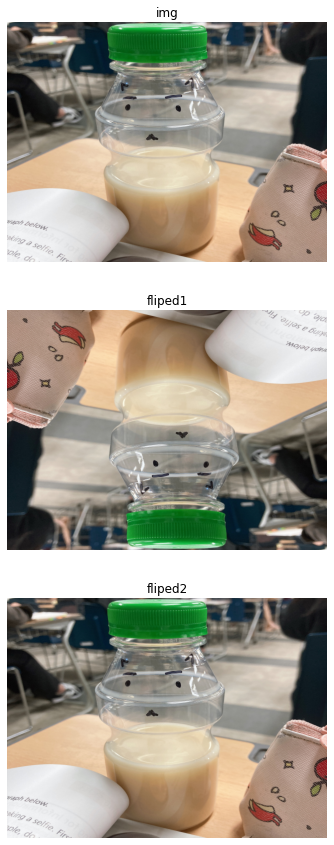

In [16]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

img = cv2.imread('./img/yo.jpg')
img = cv2.resize(img, dsize=(640, 480), interpolation=cv2.INTER_AREA)
rows, cols = img.shape[:2]

# 뒤집기 변환 행렬로 구현 ---①
st = time.time()
mflip = np.float32([ [-1, 0, cols-1],[0, -1, rows-1]]) # 변환 행렬 생성
fliped1 = cv2.warpAffine(img, mflip, (cols, rows))     # 변환 적용
print('matrix:', time.time()-st)

# remap 함수로 뒤집기 구현 ---②
st2 = time.time()
mapy, mapx = np.indices((rows, cols),dtype=np.float32) # 매핑 배열 초기화 생성
print('mapy : ',mapy)
print('mapx : ',mapx)
mapx2 = cols - mapx -1                                 # x축 좌표 뒤집기 연산
mapy2 = rows - mapy -1
print('mapy : ',mapy2 )
print('mapx : ',mapx2 )
# y축 좌표 뒤집기 연산
fliped2 = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)  # remap 적용
print('remap:', time.time()-st2)


# 결과 출력 ---③
imgs = { 'img':img, 'fliped1':fliped1, 'fliped2': fliped2 }

# 이미지 출력
fig = plt.figure(figsize=(30, 15))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(311+i), plt.axis('off'), plt.imshow(v[:,:,::-1]), plt.title(k)

plt.show()

- remap() 함수는 변환행렬로 표현할 수 없는 비선형 변환에만 사용하는 것이 좋다. 속도가 오래 걸리기 때문이다.
- 비선형 변환읜 예시를 살펴보자.

In [26]:
mapy, mapx = np.indices((rows, cols),dtype=np.float32)
print('mapx : ',mapx)

mapx :  [[  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 ...
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]
 [  0.   1.   2. ... 637. 638. 639.]]


In [22]:
l = 20
amp = 15 
np.sin(mapy/l)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04997917,  0.04997917,  0.04997917, ...,  0.04997917,
         0.04997917,  0.04997917],
       [ 0.09983342,  0.09983342,  0.09983342, ...,  0.09983342,
         0.09983342,  0.09983342],
       ...,
       [-0.9587981 , -0.9587981 , -0.9587981 , ..., -0.9587981 ,
        -0.9587981 , -0.9587981 ],
       [-0.94340163, -0.94340163, -0.94340163, ..., -0.94340163,
        -0.94340163, -0.94340163],
       [-0.9256464 , -0.9256464 , -0.9256464 , ..., -0.9256464 ,
        -0.9256464 , -0.9256464 ]], dtype=float32)

In [23]:
np.cos(mapx/l)

array([[1.        , 0.99875027, 0.9950042 , ..., 0.90725994, 0.8851067 ,
        0.86074024],
       [1.        , 0.99875027, 0.9950042 , ..., 0.90725994, 0.8851067 ,
        0.86074024],
       [1.        , 0.99875027, 0.9950042 , ..., 0.90725994, 0.8851067 ,
        0.86074024],
       ...,
       [1.        , 0.99875027, 0.9950042 , ..., 0.90725994, 0.8851067 ,
        0.86074024],
       [1.        , 0.99875027, 0.9950042 , ..., 0.90725994, 0.8851067 ,
        0.86074024],
       [1.        , 0.99875027, 0.9950042 , ..., 0.90725994, 0.8851067 ,
        0.86074024]], dtype=float32)

In [24]:
mapx + amp

array([[ 15.,  16.,  17., ..., 652., 653., 654.],
       [ 15.,  16.,  17., ..., 652., 653., 654.],
       [ 15.,  16.,  17., ..., 652., 653., 654.],
       ...,
       [ 15.,  16.,  17., ..., 652., 653., 654.],
       [ 15.,  16.,  17., ..., 652., 653., 654.],
       [ 15.,  16.,  17., ..., 652., 653., 654.]], dtype=float32)

In [25]:
mapx + amp * np.sin(mapy/l)

array([[  0.        ,   1.        ,   2.        , ..., 637.        ,
        638.        , 639.        ],
       [  0.74968755,   1.7496876 ,   2.7496877 , ..., 637.7497    ,
        638.7497    , 639.7497    ],
       [  1.4975014 ,   2.4975014 ,   3.4975014 , ..., 638.4975    ,
        639.4975    , 640.4975    ],
       ...,
       [-14.381971  , -13.381971  , -12.381971  , ..., 622.61804   ,
        623.61804   , 624.61804   ],
       [-14.151025  , -13.151025  , -12.151025  , ..., 622.849     ,
        623.849     , 624.849     ],
       [-13.884696  , -12.884696  , -11.884696  , ..., 623.1153    ,
        624.1153    , 625.1153    ]], dtype=float32)

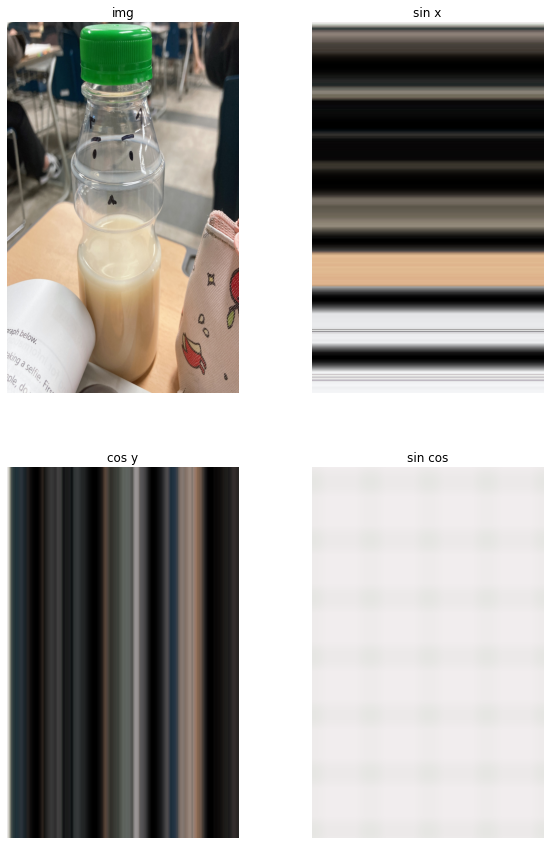

In [28]:
import cv2
import numpy as np

l = 20      # 파장(wave length), 횟수
amp = 15    # 진폭(amplitude)

img = cv2.imread('./img/yo.jpg')
img = cv2.resize(img, dsize=(500, 800), interpolation=cv2.INTER_AREA)
rows, cols = img.shape[:2]

# 초기 매핑 배열 생성 ---①
mapy, mapx = np.indices((rows, cols),dtype=np.float32)

# sin, cos 함수를 적용한 변형 매핑 연산 ---②
sinx = mapx + amp * np.sin(mapy/l)  
cosy = mapy + amp * np.cos(mapx/l)

sinx2 = np.sin(mapy/l)
cosy2 = np.cos(mapx/l)
# 영상 매핑 ---③

img_sinx=cv2.remap(img, sinx2, mapy, cv2.INTER_LINEAR) # x축만 sin 곡선 적용
img_cosy=cv2.remap(img, mapx, cosy2, cv2.INTER_LINEAR) # y축만 cos 곡선 적용
# x,y 축 모두 sin, cos 곡선 적용 및 외곽 영역 보정
img_both=cv2.remap(img, sinx2, cosy2, cv2.INTER_LINEAR, \
                    None, cv2.BORDER_REPLICATE)
# 결과 출력 
imgs = { 'img':img, 'sin x':img_sinx, 'cos y': img_cosy, 'sin cos':img_both }

# 이미지 출력
fig = plt.figure(figsize=(10, 15))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(221+i), plt.axis('off'), plt.imshow(v[:,:,::-1]), plt.title(k)


#### 오목렌즈와 볼록렌즈

- remap()을 이용하여 나타내는 방법에 대하여 공부를 해보자,
- 사각형 영상에서 동그란 원을 기준으로 작업을 진행한다.

In [31]:
import cv2
import numpy as np

img = cv2.imread('C:/Users/hu612/Desktop/jh.jpg')
print(img.shape)
rows, cols = img.shape[:2]

# ---① 설정 값 셋팅
exp = 1.7       # 볼록, 오목 지수 (오목 : 0.1 ~ 1, 볼록 : 1.1~)
scale = 1           # 변환 영역 크기 (0 ~ 1)

# 매핑 배열 생성 ---②
mapy, mapx = np.indices((rows, cols),dtype=np.float32)

# 좌상단 기준좌표에서 -1~1로 정규화된 중심점 기준 좌표로 변경 ---③
mapx = 2*mapx/(cols-1)-1
mapy = 2*mapy/(rows-1)-1
print('mapx : ', mapx)
print('mapy : ', mapy)

# 직교좌표를 극 좌표로 변환 ---④
r, theta = cv2.cartToPolar(mapx, mapy)
print('r : ',r)
print('theta :', theta)

# 왜곡 영역만 중심확대/축소 지수 적용 ---⑤
r[r< scale] = r[r<scale] **exp  

# 극 좌표를 직교좌표로 변환 ---⑥
mapx, mapy = cv2.polarToCart(r, theta)

# 중심점 기준에서 좌상단 기준으로 변경 ---⑦
mapx = ((mapx + 1)*cols-1)/2
mapy = ((mapy + 1)*rows-1)/2
print('mapx : ', mapx)
print('mapy : ', mapy)
# 재매핑 변환
distorted = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

cv2.imshow('origin', img)
cv2.imshow('distorted', distorted)
cv2.waitKey()
cv2.destroyAllWindows()

(961, 961, 3)
mapx :  [[-1.         -0.99791664 -0.99583334 ...  0.9958333   0.9979167
   1.        ]
 [-1.         -0.99791664 -0.99583334 ...  0.9958333   0.9979167
   1.        ]
 [-1.         -0.99791664 -0.99583334 ...  0.9958333   0.9979167
   1.        ]
 ...
 [-1.         -0.99791664 -0.99583334 ...  0.9958333   0.9979167
   1.        ]
 [-1.         -0.99791664 -0.99583334 ...  0.9958333   0.9979167
   1.        ]
 [-1.         -0.99791664 -0.99583334 ...  0.9958333   0.9979167
   1.        ]]
mapy :  [[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.99791664 -0.99791664 -0.99791664 ... -0.99791664 -0.99791664
  -0.99791664]
 [-0.99583334 -0.99583334 -0.99583334 ... -0.99583334 -0.99583334
  -0.99583334]
 ...
 [ 0.9958333   0.9958333   0.9958333  ...  0.9958333   0.9958333
   0.9958333 ]
 [ 0.9979167   0.9979167   0.9979167  ...  0.9979167   0.9979167
   0.9979167 ]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
r :  [[1.4

#### 방사 왜곡
- 대부분의 영상은 카메라로 얻는다.
- 카메라 렌즈의 굴곡 덕분에 왜곡이 생기기 마련이다.
- 이런 왜곡을 배럴 왜곡이라고 한다.
- 배렬 왜곡은 왜곡 계수의 값에 따라 밖으로 튀어 나오는 배럴 왜곡이 나타나기도 하고 안으로 들어 가는 핀쿠션 왜곡이 나타나기도 한다.

In [28]:
import cv2
import numpy as np

# 왜곡 계수 설정 ---①
#k1, k2, k3 = 0.5, 0.2, 0.0 # 배럴 왜곡
k1, k2, k3 = -0.3, 0, 0    # 핀큐션 왜곡

img = cv2.imread('C:/Users/hu612/Desktop/jh.jpg')
rows, cols = img.shape[:2]

# 매핑 배열 생성 ---②
mapy, mapx = np.indices((rows, cols),dtype=np.float32)

# 중앙점 좌표로 -1~1 정규화 및 극좌표 변환 ---③
mapx = 2*mapx/(cols-1)-1
mapy = 2*mapy/(rows-1)-1
r, theta = cv2.cartToPolar(mapx, mapy)

# 방사 왜곡 변영 연산 ---④
ru = r*(1+k1*(r**2) + k2*(r**4) + k3*(r**6)) 

# 직교좌표 및 좌상단 기준으로 복원 ---⑤
mapx, mapy = cv2.polarToCart(ru, theta)
mapx = ((mapx + 1)*cols-1)/2
mapy = ((mapy + 1)*rows-1)/2
# 리매핑 ---⑥
distored = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

cv2.imshow('original', img)
cv2.imshow('distorted', distored)
cv2.waitKey()
cv2.destroyAllWindows()

In [36]:
import numpy as np
import cv2

# 격자 무늬 영상 생성 ---①
img = np.full((300,400,3), 255, np.uint8)
img[::10, :, :] = 0
img[:, ::10, :] = 0
width  = img.shape[1]
height = img.shape[0]

# 왜곡 계수 설정 ---②
#k1, k2, p1, p2 = 0.001, 0, 0, 0     # 배럴 왜곡
k1, k2, p1, p2 = -0.0005, 0, 0, 0  # 핀쿠션 왜곡
distCoeff = np.float64([k1, k2, p1, p2])

# 임의의 값으로 카메라 매트릭스 설정 ---③
fx, fy = 10, 10
cx, cy = width/2, height/2
camMtx = np.float32([[fx,0, cx],
                     [0, fy, cy],
                     [0 ,0 ,1]])

# 왜곡 변형 ---④
dst = cv2.undistort(img,camMtx,distCoeff)

cv2.imshow('original', img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 5-4. 실전 워크숍

#### 1) 모자이크 처리1

In [34]:
import cv2

rate = 15               # 모자이크에 사용할 축소 비율 (1/rate)
win_title = 'mosaic'    # 창 제목
img = cv2.imread('C:/Users/hu612/Desktop/jh.jpg')    # 이미지 읽기

while True:
    x,y,w,h = cv2.selectROI(win_title, img, False) # 관심영역 선택
    if w and h:
        roi = img[y:y+h, x:x+w]   # 관심영역 지정
        roi = cv2.resize(roi, (w//rate, h//rate)) # 1/rate 비율로 축소
        # 원래 크기로 확대
        roi = cv2.resize(roi, (w,h), interpolation=cv2.INTER_AREA)  
        img[y:y+h, x:x+w] = roi   # 원본 이미지에 적용
        cv2.imshow(win_title, img)
    else:
        break
cv2.destroyAllWindows()

**안되네 여기서부터 다시,, ㅋㅋ**

#### 2) 포토샵 리퀴파이 도구

In [ ]:
import cv2
import numpy as np

win_title = 'Liquify'   # 창 이름
half = 50               # 관심 영역 절반 크기
isDragging = False      # 드래그 여부 플래그

# 리퀴파이 함수
def liquify(img, cx1,cy1, cx2,cy2) :
    # 대상 영역 좌표와 크기 설정
    x, y, w, h = cx1-half, cy1-half, half*2, half*2
    # 관심 영역 설정
    roi = img[y:y+h, x:x+w].copy()
    out = roi.copy()

    # 관심영역 기준으로 좌표 재 설정
    offset_cx1,offset_cy1 = cx1-x, cy1-y
    offset_cx2,offset_cy2 = cx2-x, cy2-y
    
    # 변환 이전 4개의 삼각형 좌표
    tri1 = [[ (0,0), (w, 0), (offset_cx1, offset_cy1)], # 상,top
            [ [0,0], [0, h], [offset_cx1, offset_cy1]], # 좌,left
            [ [w, 0], [offset_cx1, offset_cy1], [w, h]], # 우, right
            [ [0, h], [offset_cx1, offset_cy1], [w, h]]] # 하, bottom

    # 변환 이후 4개의 삼각형 좌표
    tri2 = [[ [0,0], [w,0], [offset_cx2, offset_cy2]], # 상, top
            [ [0,0], [0, h], [offset_cx2, offset_cy2]], # 좌, left
            [ [w,0], [offset_cx2, offset_cy2], [w, h]], # 우, right
            [ [0,h], [offset_cx2, offset_cy2], [w, h]]] # 하, bottom

    
    for i in range(4):
        # 각각의 삼각형 좌표에 대해 어핀 변환 적용
        matrix = cv2.getAffineTransform( np.float32(tri1[i]), \
                                         np.float32(tri2[i]))
        warped = cv2.warpAffine( roi.copy(), matrix, (w, h), \
            None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
        # 삼각형 모양의 마스크 생성
        mask = np.zeros((h, w), dtype = np.uint8)
        cv2.fillConvexPoly(mask, np.int32(tri2[i]), (255,255,255))
        
        # 마스킹 후 합성
        warped = cv2.bitwise_and(warped, warped, mask=mask)
        out = cv2.bitwise_and(out, out, mask=cv2.bitwise_not(mask))
        out = out + warped

    # 관심 영역을 원본 영상에 합성
    img[y:y+h, x:x+w] = out
    return img 

# 마우스 이벤트 핸들 함수
def onMouse(event,x,y,flags,param):     
    global cx1, cy1, isDragging, img      # 전역변수 참조
    # 마우스 중심 점을 기준으로 대상 영역 따라다니기
    if event == cv2.EVENT_MOUSEMOVE:  
        if not isDragging :
            img_draw = img.copy()       
            # 드래그 영역 표시
            cv2.rectangle(img_draw, (x-half, y-half), \
                    (x+half, y+half), (0,255,0)) 
            cv2.imshow(win_title, img_draw) # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONDOWN :   
        isDragging = True                   # 드래그 시작
        cx1, cy1 = x, y                     # 드래그 시작된 원래의 위치 좌표 저장
    elif event == cv2.EVENT_LBUTTONUP :
        if isDragging:
            isDragging = False              # 드래그 끝
            # 드래그 시작 좌표와 끝난 좌표로 리퀴파이 적용 함수 호출
            liquify(img, cx1, cy1, x, y)    
            cv2.imshow(win_title, img)

if __name__ == '__main__' :
    img = cv2.imread("../img/man_face.jpg")
    h, w = img.shape[:2]

    cv2.namedWindow(win_title)
    cv2.setMouseCallback(win_title, onMouse) 
    cv2.imshow(win_title, img)
    while True:
        key = cv2.waitKey(1)
        if key & 0xFF == 27:
            break
    cv2.destroyAllWindows()
           

#### 3) 왜곡 카메라

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
rows, cols = 240, 320
map_y, map_x = np.indices((rows, cols), dtype=np.float32)

# 거울 왜곡 효과 
map_mirrorh_x,map_mirrorh_y = map_x.copy(), map_y.copy() 
map_mirrorv_x,map_mirrorv_y = map_x.copy(), map_y.copy()    
## 좌우 대칭 거울 좌표 연산
map_mirrorh_x[: , cols//2:] = cols - map_mirrorh_x[:, cols//2:]-1
## 상하 대칭 거울 좌표 연산
map_mirrorv_y[rows//2:, :] = rows - map_mirrorv_y[rows//2:, :]-1

# 물결 효과
map_wave_x, map_wave_y = map_x.copy(), map_y.copy()
map_wave_x = map_wave_x + 15*np.sin(map_y/20)
map_wave_y = map_wave_y + 15*np.sin(map_x/20)    


# 렌즈 효과
## 렌즈 효과, 중심점 이동
map_lenz_x = 2*map_x/(cols-1)-1
map_lenz_y = 2*map_y/(rows-1)-1
## 렌즈 효과, 극좌표 변환
r, theta = cv2.cartToPolar(map_lenz_x, map_lenz_y)
r_convex = r.copy()
r_concave = r
## 볼록 렌즈 효과 매핑 좌표 연산
r_convex[r< 1] = r_convex[r<1] **2  
print(r.shape, r_convex[r<1].shape)
## 오목 렌즈 효과 매핑 좌표 연산
r_concave[r< 1] = r_concave[r<1] **0.5
## 렌즈 효과, 직교 좌표 복원
map_convex_x, map_convex_y = cv2.polarToCart(r_convex, theta)
map_concave_x, map_concave_y = cv2.polarToCart(r_concave, theta)
## 렌즈 효과, 좌상단 좌표 복원
map_convex_x = ((map_convex_x + 1)*cols-1)/2
map_convex_y = ((map_convex_y + 1)*rows-1)/2
map_concave_x = ((map_concave_x + 1)*cols-1)/2
map_concave_y = ((map_concave_y + 1)*rows-1)/2

while True:
    ret, frame = cap.read()
    # 준비한 매핑 좌표로 영상 효과 적용
    mirrorh=cv2.remap(frame,map_mirrorh_x,map_mirrorh_y,cv2.INTER_LINEAR)
    mirrorv=cv2.remap(frame,map_mirrorv_x,map_mirrorv_y,cv2.INTER_LINEAR)
    wave = cv2.remap(frame,map_wave_x,map_wave_y,cv2.INTER_LINEAR, \
                    None, cv2.BORDER_REPLICATE)
    convex = cv2.remap(frame,map_convex_x,map_convex_y,cv2.INTER_LINEAR)
    concave = cv2.remap(frame,map_concave_x,map_concave_y,cv2.INTER_LINEAR)
    # 영상 합치기
    r1 = np.hstack(( frame, mirrorh, mirrorv))
    r2 = np.hstack(( wave, convex, concave))
    merged = np.vstack((r1, r2))

    cv2.imshow('distorted',merged)
    if cv2.waitKey(1) & 0xFF== 27:
        break
cap.release
cv2.destroyAllWindows()